# While loops

Now that we've covered `for` loops, it's time to talk about its sister construct—`while` loops.
The `while` loop is used when you know the stop condition, but might not know or don't care how long it takes to get there.

## Summary of commands

In Python, the general structure is like this:

```python
while condition:
    do something repeatedly until condition becomes False. Try not to get stuck in an infinite loop!
```

We'll also see the following NumPy commands:
- [`np.absolute()`](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html) - returns the absolute value of $x$
- [`np.sqrt()`](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html) - returns the square root of $x$.

## Approximating square roots

If $x$ is an approximate value of the square root of a number $a$, then 

$$ x' = \dfrac{1}{2} \left( x + \dfrac{a}{x} \right) $$

is generally a better approximation.
For example, with $a = 2$, starting with $x = 1$, we obtain the following successive approximations: $1, \dfrac{3}{2}, \dfrac{17}{12}, \dfrac{577}{408}, \dots$ approaching in the limit the true value of $\sqrt{2} = 1.4142135...$

Using the above formula, write a script to compute iteratively the value of $\sqrt{10}$. 
At each step, compare your solution to the exact value of $\sqrt{10}$ and stop your iteration when the difference between your solution and the exact one is less than $10^{-4}$.
Start the iteration with the initial guess $x = 1$. 
Plot the absolute value of the error versus the current iteration number.

3.162277665175675 3.1622776601683795


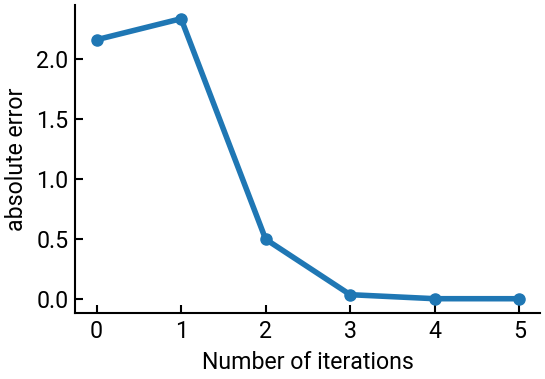

In [8]:
import numpy as np
import matplotlib.pyplot as plt

a = 10
x = [1]   # we will keep x as a list to make it easy to grow
thresh = 1e-4

while np.absolute(x[-1] - np.sqrt(a)) >= thresh:
    x.append(1/2 * (x[-1] + a / x[-1]))

print(x[-1], np.sqrt(a))

fig, ax = plt.subplots()
ax.plot(np.absolute(x - np.sqrt(a)), 'o-')
ax.set(xlabel="Number of iterations", ylabel="absolute error")
plt.show()

```{note}
In MATLAB, it's easy to create an array that continually grows longer as you add more elements to it in a loop.
This feature is called _dynamic resizing_ and while it is fine, it is generally recommended to _avoid doing so_ as it eats up a lot of memory and is inefficient.
It could also be dangerous: If you don't know the size ahead of time, what if your vector grows infinitely long? ☠️

In fact, Python NumPy arrays cannot change in size once created and you have to _preallocate_ arrays properly for your problem.
In the above, we used a regular list data structure which is efficient to grow using `append()`.
```